# CUSTOMER DATA (KAGGLE)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import import_ipynb
import Template as t
%matplotlib inline

importing Jupyter notebook from Template.ipynb


In [3]:
df=t.load_data('Mall_Customers.csv','csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
t.missing_count(df)

,Missing percentage,Missing sum
CustomerID,0.0,0
Gender,0.0,0
Age,0.0,0
Annual Income (k$),0.0,0
Spending Score (1-100),0.0,0


In [7]:
df=t.remove_columns(df,['CustomerID'])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [8]:
t.encode(df,'Gender','label') # label encoding the gender column

C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [15]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
for i in df.columns:
    df[i]=scaler.fit_transform(df[[i]])
    
df

    

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


# K Means


In [16]:
# First, let's create an instance of k-means with random parameters
from sklearn.cluster import KMeans

kmeans = KMeans(init='random', n_clusters=3, n_init=10, max_iter=300, random_state=42)






Initial centroid chosen at random and 3 clusters chosen. Since k means is a non-deterministic algorithm, multiple runs of k means on the same data can yield different results. So, 10 initialization steps are taken with each step having 300 iterations to converge. Initialization step with lowest sum of squared error will be considered.

In [17]:
kmeans.fit(df) #applying k means on our data

KMeans(init='random', n_clusters=3, random_state=42)

In [20]:
kmeans.inertia_ #lowest sum of squared errors for all runs

484.80399126122023

In [21]:
kmeans.n_iter_

6

In [22]:
# Let's try different values of k (number of clusters) to see which value provides optimal results
#We will use elbow method for that

sse=[]
for k in range(1,11):
    kmeans = KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# sse will contain sum of squared errors for all iterations 



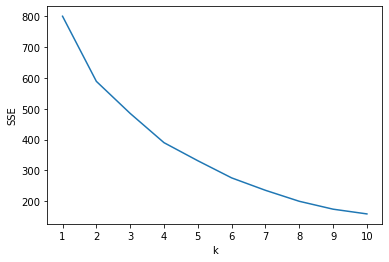

In [29]:
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

# It is difficult to find the elbow point from the graph so we will use the below code to find the optimal number of clusters




In [28]:
#!pip install kneed
from kneed import KneeLocator

kl=KneeLocator(range(1,11),sse, curve='convex',direction='decreasing')
kl.elbow



4

4 clusters will provide an optimal results for clustering

In [30]:
from sklearn.metrics import silhouette_score

sc=[]
for k in range(2,11):
    kmeans = KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    sc.append(score)





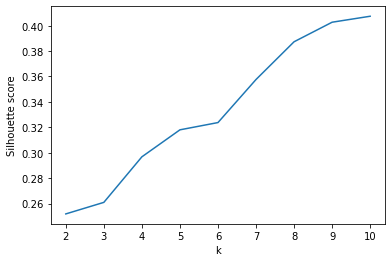

In [32]:
plt.plot(range(2,11),sc)
plt.xticks(range(2,11))
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()



Silhouette score suggests 10 clusters would yield best clustering since it has the highest score but having 10 clusters is not feasible at all.

In [138]:
kmeans = KMeans(init='random', n_clusters=4, n_init=10, max_iter=300, random_state=42)
kmeans.fit(df)
print('K means sse for 4 clusters =', kmeans.inertia_)
print('K means silhouette score for 4 clusters = ')
silhouette_score(df,kmeans.labels_)




K means sse for 4 clusters = 389.92403295819327
K means silhouette score for 4 clusters = 


0.29676146947439397

In [139]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents , columns = ['pca1', 'pca2'])
principalDF = pd.concat([principalDf, pd.Series(kmeans.labels_)], axis = 1)
principalDF.head()
#principalDF.iloc[:,2]



,pca1,pca2,0
0,-0.406383,-0.520714,0
1,-1.427673,-0.367310,0
2,0.050761,-1.894068,0
3,-1.694513,-1.631908,0
4,-0.313108,-1.810483,0


Now we can visualise our clusters in 2 dimensions and observe if clusters are seperated.

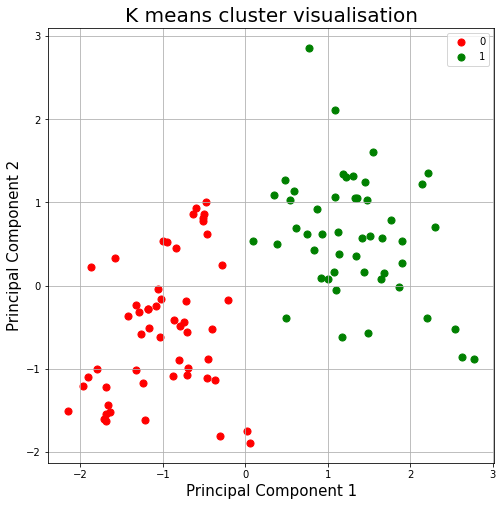

In [140]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('K means cluster visualisation', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDF.iloc[:,2] == target
    ax.scatter(principalDF.loc[indicesToKeep, 'pca1']
               , principalDF.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

K means with 4 clusters with 10 initial centroid picks provides a descent seperation of clusters

# Hierarchal/Agglomerative

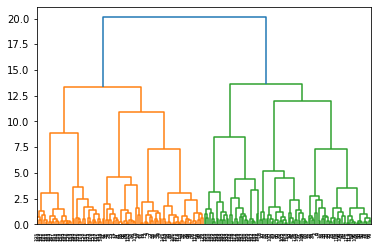

In [143]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))




The dendrogram above shows the hierarchal bottom up approach starting with every data point as a cluster and ending on one cluster. Through visualising the graph, we can determine how many clusters will be suitable for our case. In this case, optimal solution could be 2 clusters but we will try others as well.

In [154]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(df)
labels=model.labels_
labels




array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [155]:
silhouette_score(df,model.labels_)

0.24177953745462927

In [156]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents , columns = ['pca1', 'pca2'])
principalDF = pd.concat([principalDf, pd.Series(model.labels_)], axis = 1)
principalDF.head()





,pca1,pca2,0
0,-0.406383,-0.520714,1
1,-1.427673,-0.367310,1
2,0.050761,-1.894068,0
3,-1.694513,-1.631908,1
4,-0.313108,-1.810483,0


In [201]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Agglomerative' cluster visualisation', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDF.iloc[:,2] == target
    ax.scatter(principalDF.loc[indicesToKeep, 'pca1']
               , principalDF.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

SyntaxError: invalid syntax (<ipython-input-201-ad06732c2d39>, line 5)

In [168]:
# Let's also try manhattan distance. Since ward linkage can only work on euclidean distance, we can change the linkage to average

model = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='average')
model.fit(df)
labels=model.labels_
labels


array([2, 2, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 0, 3, 1, 2, 0, 2, 1, 3, 1, 2,
       0, 2, 0, 2, 0, 2, 0, 3, 1, 3, 1, 2, 0, 3, 0, 3, 0, 3, 0, 2, 1, 0,
       0, 3, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2,
       0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 3, 4, 2, 4, 2, 4, 2,
       0, 3, 4, 3, 0, 2, 4, 3, 0, 2, 0, 3, 4, 2, 4, 3, 0, 2, 4, 2, 0, 3,
       0, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 0, 2, 4, 2, 4, 2, 0, 3,
       4, 2, 4, 2, 0, 3, 4, 3, 0, 2, 0, 2, 0, 3, 0, 3, 4, 3, 0, 3, 0, 2,
       4, 2], dtype=int64)

In [169]:
silhouette_score(df,model.labels_) # keeping manhattan distance has improved the score slightly.

0.2944849774846021

In [164]:
# Let's try increasing the number of clusters keeping manhattan distance
model = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
model.fit(df)
labels=model.labels_
labels

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int64)

In [165]:
silhouette_score(df,model.labels_) # very slight increase in the silhouette score

0.2776035125578272

In [166]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents , columns = ['pca1', 'pca2'])
principalDF = pd.concat([principalDf, pd.Series(model.labels_)], axis = 1)
principalDF.head()

,pca1,pca2,0
0,-0.406383,-0.520714,0
1,-1.427673,-0.367310,0
2,0.050761,-1.894068,1
3,-1.694513,-1.631908,1
4,-0.313108,-1.810483,1


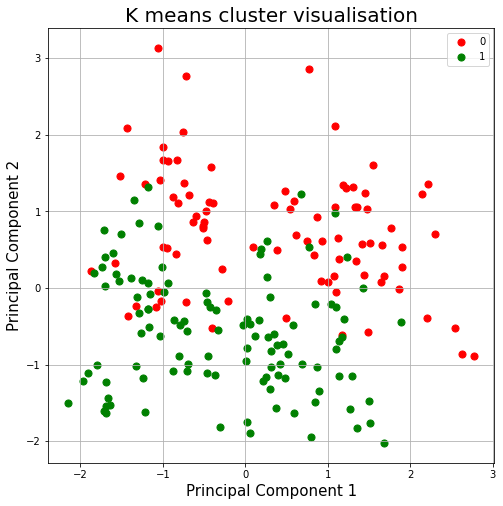

In [167]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Agglomerative cluster visualisation', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDF.iloc[:,2] == target
    ax.scatter(principalDF.loc[indicesToKeep, 'pca1']
               , principalDF.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

This experiment shows that silhouette score can be misleading sometimes. Although silhouette score for manhattan distance was slightly better than euclidean for the same number of clusters, pca graph shows that euclidean was able to distinguish the clusters in a much better way.

# DBSCAN

In [117]:
from sklearn.cluster import DBSCAN

for i in [0.5,0.6,0.7,0.8,0.9]:
    for j in [3,4,5,6,7,8,9,10]:
        dbscan = DBSCAN(eps=i, min_samples=j)
        dbscan.fit(df)
        labels=dbscan.labels_
        print('eps = ', i, 'minimum samples = ', j)
        print(labels)
        print('Silhouette score = ' , silhouette_score(df,dbscan.labels_))
        nplabels=np.array(dbscan.labels_)
        print('Number of clusters = ',len(np.unique(nplabels))-1)
        



eps =  0.5 minimum samples =  3
[-1  1 -1  0  2  0 -1 -1 -1  0 -1 -1  3  0 -1  1  2  1 -1 -1 -1  1 -1  1
  3  1  2 -1  2  0 -1  0 -1 -1  3  0 -1 -1  2  0 -1 -1  6  5 -1  0  4  5
  5  5  4 -1  5  6  4  6  4  6  5  6  6  7  8  4  6  7  4  8  7  5  6  4
  4  4  6  9  4 -1  5  4  6 -1  6  4  5  6  4  5 -1  4  8  9  6  5  5  9
  4  5  6  9  5  4  6  9  6  5  8  6  6  6  6  5  5  9  5  5  8  4  4  4
  9  5 -1 10  5 11 -1 10 -1 12 -1 12  5 11 13 11 15 12 13 11 -1 10  5 11
 13 10 -1 11 16 10 14 10 15 11 15 11 14 11 14 11 -1 11 13 11 -1 11 14 11
 16 17 14 17 14 10 -1 11 -1 17 -1 10 16 11 -1 11 16 -1 -1 -1 -1 11 16 -1
 -1 11 -1 -1 -1 -1 -1 -1]
Silhouette score =  0.21460367830515822
Number of clusters =  18
eps =  0.5 minimum samples =  4
[-1 -1 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  1  2  1 -1 -1 -1  1 -1  1
 -1  1  2 -1  2  0 -1  0 -1 -1 -1  0 -1 -1  2  0 -1 -1  5  4 -1  0  3  4
  4  4  3 -1  4  5  3  5  3  5  4  5  5 -1 -1  3  5 -1  3 -1 -1  4  5  3
  3  3  5  6  3 -1  4  3  5 -1  5  3  4  5

eps =  0.8 minimum samples =  3
[-1  0 -1  1  1  1 -1  1  2  1  2 -1  1  1 -1  0  1  0  0 -1 -1  0  1  0
  1  0  1  0  1  1  2  1  2  0  1  1  1  1  1  1  1  0  0  1  1  1  1  1
  1  1  1  0  1  0  1  0  1  0  1  0  0  0  1  1  0  0  1  1  0  1  0  1
  1  1  0  0  1  0  1  1  0  0  0  1  1  0  1  1  1  1  1  0  0  1  1  0
  1  1  0  0  1  1  0  0  0  1  1  0  0  0  0  1  1  0  1  1  1  1  1  1
  0  1  1  0  1  1  0  0  0  0  0  0  1  1  0  1  3  0  0  1  3  0  1  1
  0  0  0  1  3  0  0  0  3  1  3  1  0  1  0  1  1  1  0  1  0  1  0  1
  3  0  0  0  0  0  3  1  0  0  0  0  3  1  0  1  3  0  3  0  3  1  3  1
 -1  1  3  1  3 -1 -1 -1]
Silhouette score =  0.17241058408749224
Number of clusters =  4
eps =  0.8 minimum samples =  4
[-1  0 -1  1  1  1 -1  1  2  1  2 -1  1  1 -1  0  1  0  3 -1 -1  0  1  0
  1  0  1  0  1  1  2  1  2  0  1  1  1  1  1  1  1  0  3  1  1  1  1  1
  1  1  1  3  1  3  1  3  1  3  1  3  3  3  1  1  3  3  1  1  3  1  3  1
  1  1  3  3  1  3  1  1  3  3  3  1  1  3 

Silhouette score =  0.2063896976811075
Number of clusters =  4
eps =  0.9 minimum samples =  9
[-1 -1 -1  0  0  0  0  0 -1  0 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1  0 -1
  0 -1  0 -1  0  0 -1  0 -1 -1  0  0  0  0  0  0  0 -1  1  0  0  0  0  0
  0  0  0  1  0  1  0  1  0  1  0  1  1  2  0  0  1  2  0  0  2  0  1  0
  0  0  1  2  0  1  0  0  1  1  1  0  0  1  0  0  0  0  0  2  1  0  0  2
  0  0  1  2  0  0  1  2  1  0  0  1  1  1  1  0  0  2  0  0  0  0  0  0
  2  0  0  3  0  0  1  3 -1  3  1  3  0  0 -1  0 -1  3 -1  0 -1  3  0  0
 -1  3  1  0  0  3  1  3 -1  0 -1  0  1  0  1  0  0  0 -1  0  1  0  1  0
  0  3  1  3  1  3 -1  0  1  3  1  3 -1  0  1  0 -1  3 -1  3 -1  0 -1  0
 -1  0 -1  0 -1 -1 -1 -1]
Silhouette score =  0.15721331082479176
Number of clusters =  4
eps =  0.9 minimum samples =  10
[-1 -1 -1  0  0  0 -1  0 -1  0 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1
  0 -1  0 -1  0  0 -1  0 -1 -1  0  0  0  0  0  0  0 -1  1  0  0  0  0  0
  0  0  0  2  0  1  0  1  0  1  0  1  1  2  0  0  1 

In [176]:
# According to above results, we'll try and plot PCA graph for the best parameters
i=float(input('Enter eps value: '))
j=float(input('Enter minimum number of samples: '))
dbscan = DBSCAN(eps=i, min_samples=j)
dbscan.fit(df)
labels=dbscan.labels_
print('eps = ', i, 'minimum samples = ', j)
print(labels)
print('Silhouette score = ' , silhouette_score(df,dbscan.labels_))
nplabels=np.array(dbscan.labels_)
print('Number of clusters = ',len(np.unique(nplabels))-1)
    
    
    

Enter eps value: 0.9
Enter minimum number of samples: 5
eps =  0.9 minimum samples =  5.0
[-1  0 -1  1  1  1  1  1 -1  1 -1  1  1  1 -1  0  1  0  0  1 -1  0  1  0
  1  0  1  0  1  1 -1  1 -1  0  1  1  1  1  1  1  1  0  0  1  1  1  1  1
  1  1  1  0  1  0  1  0  1  0  1  0  0  0  1  1  0  0  1  1  0  1  0  1
  1  1  0  0  1  0  1  1  0  0  0  1  1  0  1  1  1  1  1  0  0  1  1  0
  1  1  0  0  1  1  0  0  0  1  1  0  0  0  0  1  1  0  1  1  1  1  1  1
  0  1  1  0  1  1  0  0  0  0  0  0  1  1  0  1  1  0  0  1  1  0  1  1
  0  0  0  1  1  0  0  0  1  1  1  1  0  1  0  1  1  1  0  1  0  1  0  1
  1  0  0  0  0  0  1  1  0  0  0  0  1  1  0  1  1  0  1  0  1  1  1  1
 -1  1  1  1 -1 -1 -1 -1]
Silhouette score =  0.2543871824295202
Number of clusters =  2


 -1 in the above labels represent outliers or noise. Out of all these results, we need to find the optimal value of eps and min_samples which can yield a good silhouette score, descent amount of clusters and minimum number of outliers 


In [177]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents , columns = ['pca1', 'pca2'])
principalDF = pd.concat([principalDf, pd.Series(dbscan.labels_)], axis = 1)
principalDF.head()



,pca1,pca2,0
0,-0.406383,-0.520714,-1
1,-1.427673,-0.367310,0
2,0.050761,-1.894068,-1
3,-1.694513,-1.631908,1
4,-0.313108,-1.810483,1


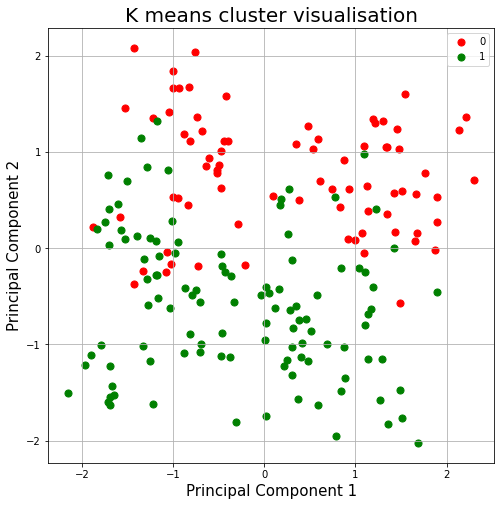

In [178]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('DBSCAN cluster visualisation', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDF.iloc[:,2] == target
    ax.scatter(principalDF.loc[indicesToKeep, 'pca1']
               , principalDF.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Of all 3 techniques, K means turns out to be the best one where minimum overlapping occurrs between classes.

# Credit Card default data (UCI)

In [206]:
df1=t.load_data('credit card default.csv','csv')
df1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [207]:
df1=t.remove_columns(df1,['ID'])
df1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [208]:
df1.shape

(30000, 24)

In [209]:
t.missing_count(df1) # no missing values

,Missing percentage,Missing sum
LIMIT_BAL,0.0,0
SEX,0.0,0
EDUCATION,0.0,0
MARRIAGE,0.0,0
AGE,0.0,0
PAY_0,0.0,0
PAY_2,0.0,0
PAY_3,0.0,0
PAY_4,0.0,0
PAY_5,0.0,0


In [210]:
t.df_details(df1)

Shape:  (30000, 24)
Column types: 
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object
H/T?H


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


All columns are numeric so we don't need to encode them. However, we do need to standard scale them to bring each column within the same range.

In [211]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
for i in df1.columns:
    df1[i]=scaler.fit_transform(df1[[i]])
    
df1

    

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1.876378
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1.876378
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.532942
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.532942
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.532942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,1.451114,-1.057295,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,-0.532942
29996,-0.134759,-1.234323,1.451114,0.858557,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,...,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,-0.532942
29997,-1.059646,-1.234323,0.185828,0.858557,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,...,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1.876378
29998,-0.674276,-1.234323,1.451114,-1.057295,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,...,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1.876378


All columns are scaled so we can proceed towards K means clustering

# K Means

In [212]:
# First, let's create an instance of k-means with random parameters
from sklearn.cluster import KMeans

kmeans = KMeans(init='random', n_clusters=3, n_init=10, max_iter=300, random_state=42)




In [213]:
kmeans.fit(df1) #applying k means on our data
kmeans.inertia_ #lowest sum of squared errors for all runs

517799.4788842483

In [214]:
# Let's try different values of k (number of clusters) to see which value provides optimal results
#We will use elbow method for that

sse=[]
for k in range(1,11):
    kmeans = KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(df1)
    sse.append(kmeans.inertia_)

# sse will contain sum of squared errors for all iterations






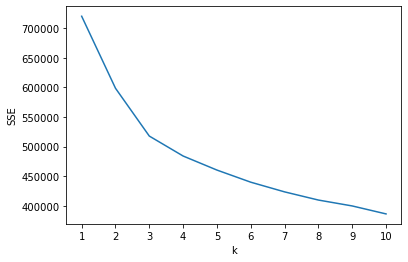

In [215]:
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

# It is difficult to find the elbow point from the graph so we will use the below code to find the optimal number of clusters




In [216]:
from kneed import KneeLocator

kl=KneeLocator(range(1,11),sse, curve='convex',direction='decreasing')
kl.elbow

3

In [217]:
sc=[]
for k in range(2,11):
    kmeans = KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(df1)
    score = silhouette_score(df1, kmeans.labels_)
    sc.append(score)

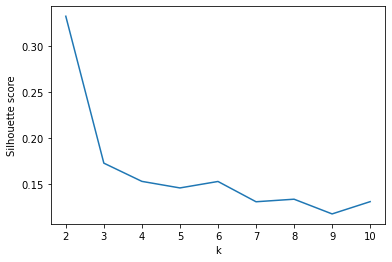

In [218]:
plt.plot(range(2,11),sc)
plt.xticks(range(2,11))
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()




In [219]:
kmeans = KMeans(init='random', n_clusters=2, n_init=10, max_iter=300, random_state=42)
kmeans.fit(df1)
print('K means sse for 2 clusters =', kmeans.inertia_)
print('K means silhouette score for 4 clusters = ')
silhouette_score(df1,kmeans.labels_)



K means sse for 4 clusters = 598492.513543568
K means silhouette score for 4 clusters = 


0.33278758992350177

In [221]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df1)
principalDf = pd.DataFrame(data = principalComponents , columns = ['pca1', 'pca2'])
principalDF = pd.concat([principalDf, pd.Series(kmeans.labels_)], axis = 1)
principalDF.head()

,pca1,pca2,0
0,-1.800973,-1.270393,1
1,-0.671428,-2.406269,1
2,-0.858546,-0.969766,1
3,-0.210006,-0.706130,1
4,-0.860082,0.002983,1


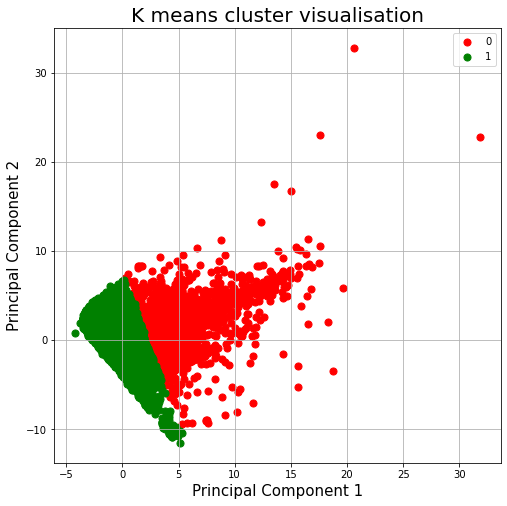

In [222]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('K means cluster visualisation', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDF.iloc[:,2] == target
    ax.scatter(principalDF.loc[indicesToKeep, 'pca1']
               , principalDF.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Hierarchal/Agglomerative

Due to computational RAM constraints, the following code is impossible to run on my PC. If you can run them on your PC, you will be easily able to observe the results.

In [224]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(df1, method='complete'))

MemoryError: Unable to allocate 3.35 GiB for an array with shape (449985000,) and data type float64

<Figure size 1440x720 with 0 Axes>

In [225]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(df1)
labels=model.labels_
labels



MemoryError: unable to allocate array data.

In [ ]:
silhouette_score(df1,model.labels_)

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df1)
principalDf = pd.DataFrame(data = principalComponents , columns = ['pca1', 'pca2'])
principalDF = pd.concat([principalDf, pd.Series(model.labels_)], axis = 1)
principalDF.head()



In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Agglomerative' cluster visualisation', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDF.iloc[:,2] == target
    ax.scatter(principalDF.loc[indicesToKeep, 'pca1']
               , principalDF.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
             
             

In [ ]:
# Let's also try manhattan distance. Since ward linkage can only work on euclidean distance, we can change the linkage to average

model = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='average')
model.fit(df1)
labels=model.labels_
labels

In [ ]:
silhouette_score(df,model.labels_) # keeping manhattan distance has improved the score slightly.

# Let's try increasing the number of clusters keeping manhattan distance

model = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
model.fit(df1)
labels=model.labels_
labels



In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Agglomerative cluster visualisation', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDF.iloc[:,2] == target
    ax.scatter(principalDF.loc[indicesToKeep, 'pca1']
               , principalDF.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# DBSCAN 

In [226]:
from sklearn.cluster import DBSCAN

for i in [0.5,0.6,0.7,0.8,0.9]:
    for j in [3,4,5,6,7,8,9,10]:
        dbscan = DBSCAN(eps=i, min_samples=j)
        dbscan.fit(df1)
        labels=dbscan.labels_
        print('eps = ', i, 'minimum samples = ', j)
        print(labels)
        print('Silhouette score = ' , silhouette_score(df,dbscan.labels_))
        nplabels=np.array(dbscan.labels_)
        print('Number of clusters = ',len(np.unique(nplabels))-1)
        



eps =  0.5 minimum samples =  3
[-1 -1  0 ... -1 -1 -1]


ValueError: Expected 2D array, got scalar array instead:
array=None.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# According to above results, we'll try and plot PCA graph for the best parameters
i=float(input('Enter eps value: '))
j=float(input('Enter minimum number of samples: '))
dbscan = DBSCAN(eps=i, min_samples=j)
dbscan.fit(df1)
labels=dbscan.labels_
print('eps = ', i, 'minimum samples = ', j)
print(labels)
print('Silhouette score = ' , silhouette_score(df,dbscan.labels_))
nplabels=np.array(dbscan.labels_)
print('Number of clusters = ',len(np.unique(nplabels))-1)
    
    
    

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df1)
principalDf = pd.DataFrame(data = principalComponents , columns = ['pca1', 'pca2'])
principalDF = pd.concat([principalDf, pd.Series(dbscan.labels_)], axis = 1)
principalDF.head()



In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('DBSCAN cluster visualisation', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDF.iloc[:,2] == target
    ax.scatter(principalDF.loc[indicesToKeep, 'pca1']
               , principalDF.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()